## **Zadanie 2 - LSTM**

In [1]:
import sys

sys.path.append('../')
import torch.optim as optim
import torch.nn as nn
import torch
from dataset_numbers import NumberSequenceDataset, prepare_numbers_dataset, load_seq
from metrics import eval_model, plot_train_perf
from models import LSTMModel
from pretty_confusion_matrix import pp_matrix_from_data
from torch.utils.data import DataLoader

from routines.uniform_split import uniform_split, count_class_samples
from routines.train_model import train_model

import matplotlib.pyplot as plt

## Corrupted samples

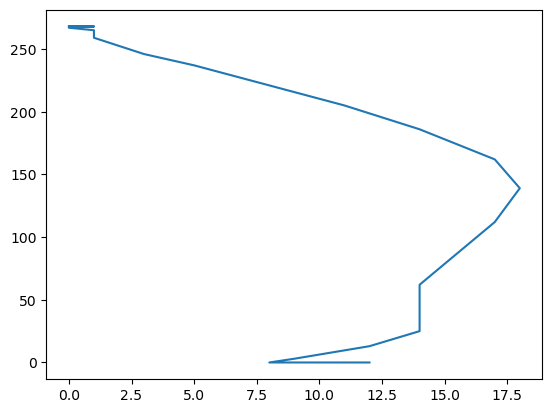

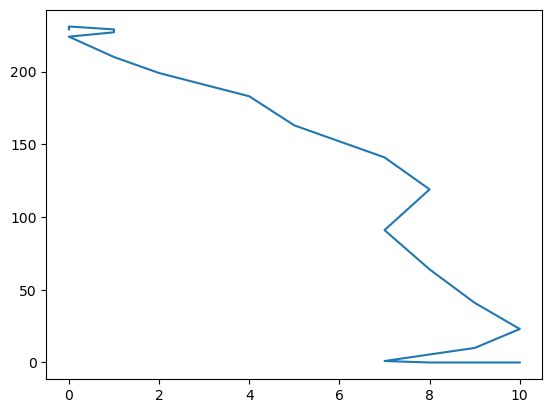

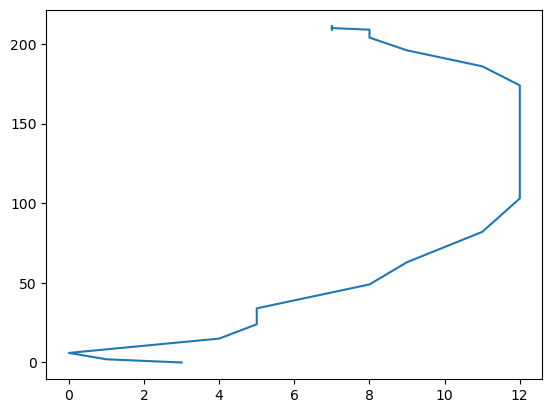

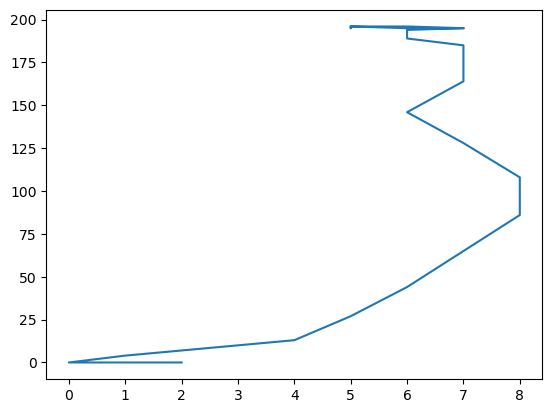

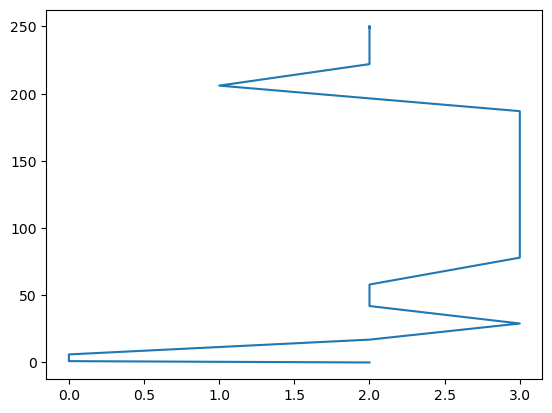

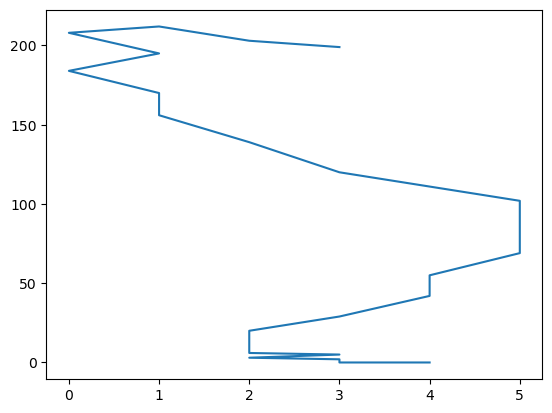

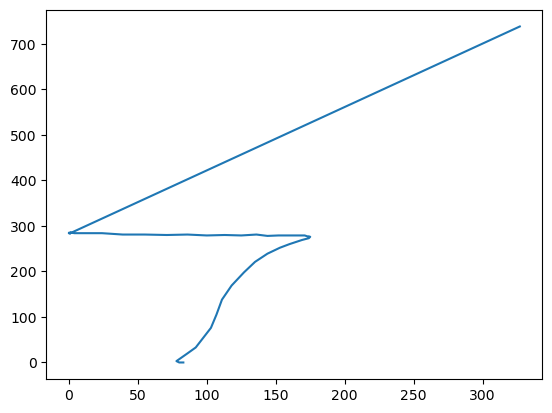

In [6]:
x_train, y_train, x_test, y_test = load_seq('2/dataset.mat')


train_corrupted_indices = [0, 1, 2, 3, 4, 5, 75]
test_corrupted_indices = [97]

for item in train_corrupted_indices:
    x = x_train[item][0][0]
    y = x_train[item][0][1]
    # print(f"{x_train[1]}")
    plt.plot(x,y)
    plt.show()


In [5]:
x_train[0][0][1]

array([268, 268, 268, 267, 265, 259, 246, 237, 205, 186, 162, 139, 112,
        62,  25,  13,   3,   0,   0], dtype=uint16)

In [2]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 350
PAD = 'pre'
SHUFFLE = True
DATA_PTH = '2/dataset.mat'
if torch.cuda.is_available():
    DEVICE = torch.device("cuda:0")
else:
    DEVICE = torch.device("cpu")

In [3]:
input_size = 2
hidden_size = 128
num_layers = 2
output_size = 10
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [4]:
x_train, y_train, x_test, y_test = prepare_numbers_dataset(DATA_PTH, pad=PAD)

train_ds = NumberSequenceDataset(x_train, y_train)
test_ds = NumberSequenceDataset(x_test, y_test)

testloader = DataLoader(test_ds, batch_size=32, shuffle=False)

### Trenovanie na celom trenovacom sete

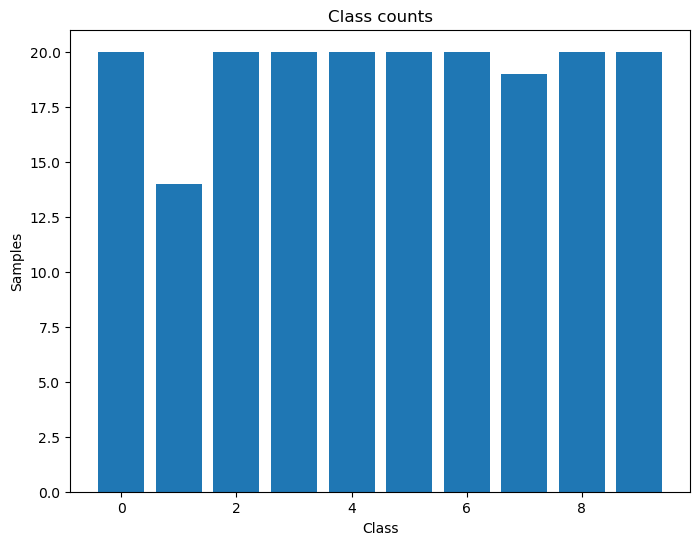

Epoch: 1/350 | Train Accuracy 0.09 | Train Loss 2.30 | Val Accuracy 0.19 | Val Loss 2.34
Epoch: 2/350 | Train Accuracy 0.13 | Train Loss 2.32 | Val Accuracy 0.09 | Val Loss 2.35
Epoch: 3/350 | Train Accuracy 0.10 | Train Loss 2.25 | Val Accuracy 0.09 | Val Loss 2.32
Epoch: 4/350 | Train Accuracy 0.10 | Train Loss 2.28 | Val Accuracy 0.09 | Val Loss 2.30
Epoch: 5/350 | Train Accuracy 0.12 | Train Loss 2.23 | Val Accuracy 0.19 | Val Loss 2.22
Epoch: 6/350 | Train Accuracy 0.21 | Train Loss 2.12 | Val Accuracy 0.21 | Val Loss 2.09
Epoch: 7/350 | Train Accuracy 0.23 | Train Loss 1.97 | Val Accuracy 0.19 | Val Loss 2.12
Epoch: 8/350 | Train Accuracy 0.29 | Train Loss 1.87 | Val Accuracy 0.20 | Val Loss 2.05
Epoch: 9/350 | Train Accuracy 0.32 | Train Loss 1.89 | Val Accuracy 0.34 | Val Loss 1.98
Epoch: 10/350 | Train Accuracy 0.35 | Train Loss 1.88 | Val Accuracy 0.34 | Val Loss 2.05
Epoch: 11/350 | Train Accuracy 0.34 | Train Loss 1.77 | Val Accuracy 0.30 | Val Loss 2.02
Epoch: 12/350 | Tra

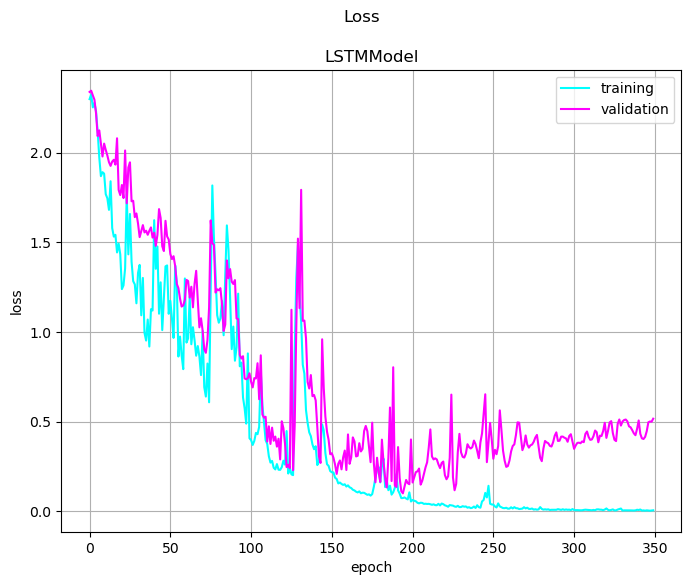

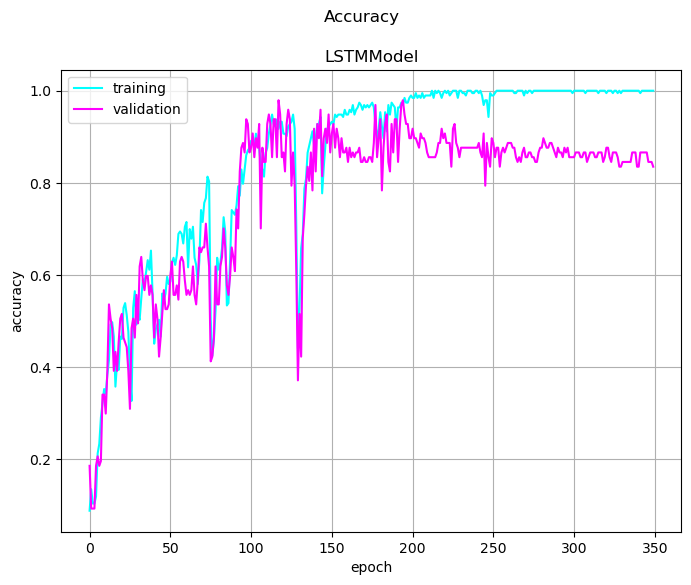

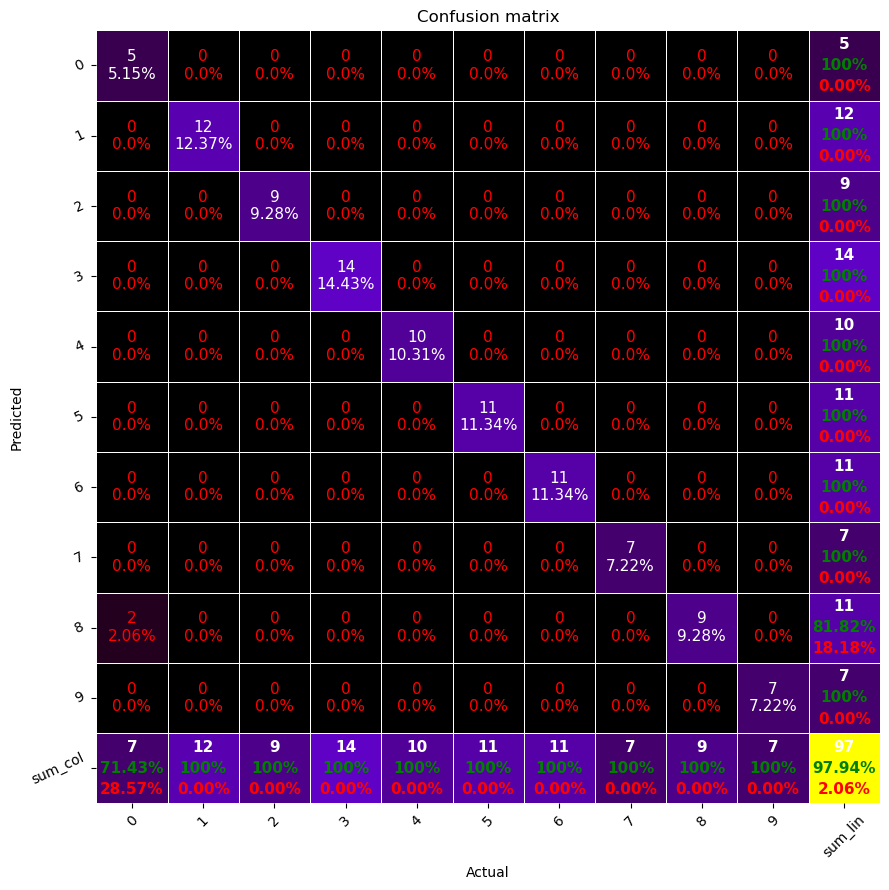

In [5]:
class_counts = count_class_samples(dataset=train_ds)
plt.figure(figsize=(8, 6))
plt.bar(list(class_counts.keys()), list(class_counts.values()))
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Class counts")
plt.show()

trainloader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
stats, best_model = train_model(model,trainloader=trainloader, testloader=testloader, num_epochs=EPOCHS, criterion=criterion, optimizer=optimizer, device=DEVICE)
predictions, labels = eval_model(best_model, testloader)
plot_train_perf(
    model=best_model,
    path=None,
    train_loss=stats["train_loss"],
    train_acc=stats["train_acc"],
    val_loss=stats["val_loss"],
    val_acc=stats["val_acc"],
)

pp_matrix_from_data(
    labels, predictions, columns=[i for i in range(10)], cmap="gnuplot"
)

## Trenovanie 64 neuronov

Epoch: 1/350 | Train Accuracy 0.09 | Train Loss 2.30 | Val Accuracy 0.30 | Val Loss 2.33
Epoch: 2/350 | Train Accuracy 0.07 | Train Loss 2.31 | Val Accuracy 0.11 | Val Loss 2.34
Epoch: 3/350 | Train Accuracy 0.10 | Train Loss 2.29 | Val Accuracy 0.11 | Val Loss 2.34
Epoch: 4/350 | Train Accuracy 0.10 | Train Loss 2.32 | Val Accuracy 0.11 | Val Loss 2.34
Epoch: 5/350 | Train Accuracy 0.12 | Train Loss 2.28 | Val Accuracy 0.12 | Val Loss 2.32
Epoch: 6/350 | Train Accuracy 0.13 | Train Loss 2.28 | Val Accuracy 0.11 | Val Loss 2.30
Epoch: 7/350 | Train Accuracy 0.12 | Train Loss 2.27 | Val Accuracy 0.21 | Val Loss 2.28
Epoch: 8/350 | Train Accuracy 0.19 | Train Loss 2.24 | Val Accuracy 0.21 | Val Loss 2.28
Epoch: 9/350 | Train Accuracy 0.24 | Train Loss 2.19 | Val Accuracy 0.19 | Val Loss 2.21
Epoch: 10/350 | Train Accuracy 0.21 | Train Loss 2.05 | Val Accuracy 0.19 | Val Loss 2.20
Epoch: 11/350 | Train Accuracy 0.22 | Train Loss 1.88 | Val Accuracy 0.19 | Val Loss 2.27
Epoch: 12/350 | Tra

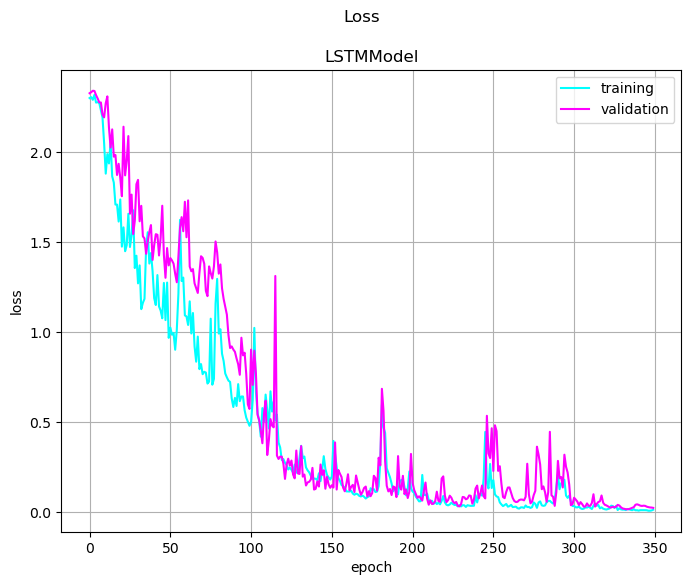

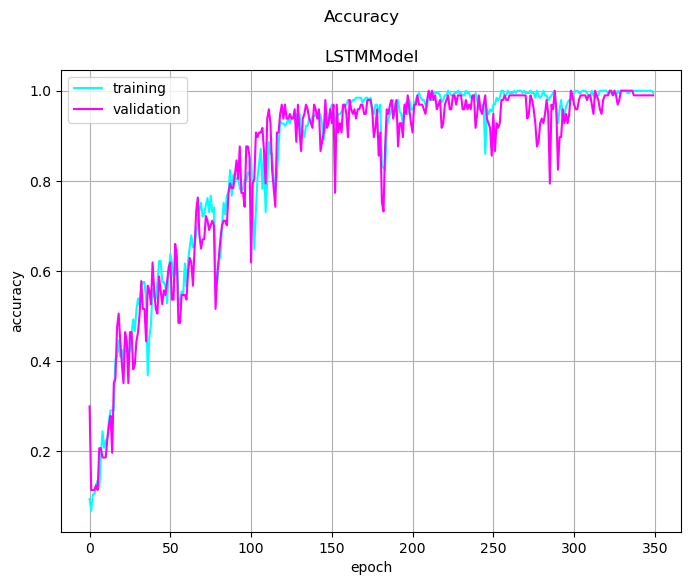

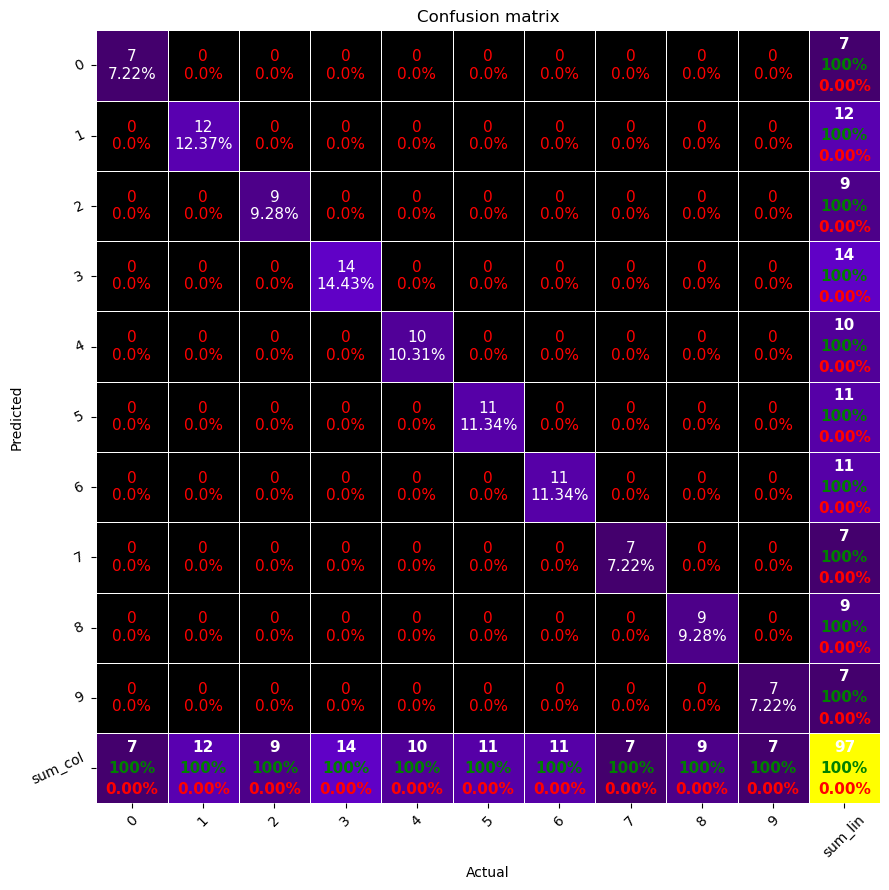

In [6]:
hidden_size = 64
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

stats, best_model = train_model(model,trainloader=trainloader, testloader=testloader, num_epochs=EPOCHS, criterion=criterion, optimizer=optimizer, device=DEVICE)
predictions, labels = eval_model(best_model, testloader)
plot_train_perf(
    model=best_model,
    path=None,
    train_loss=stats["train_loss"],
    train_acc=stats["train_acc"],
    val_loss=stats["val_loss"],
    val_acc=stats["val_acc"],
)

pp_matrix_from_data(
    labels, predictions, columns=[i for i in range(10)], cmap="gnuplot"
)

## Trenovanie 64 neuronov, 1 skryta vrstva

Batch 3/7

Epoch: 1/500 | Train Accuracy 0.10 | Train Loss 2.31 | Val Accuracy 0.11 | Val Loss 2.32
Batch 6/7

c:\Users\marti\miniconda3\envs\win-torch\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 2/500 | Train Accuracy 0.10 | Train Loss 2.29 | Val Accuracy 0.11 | Val Loss 2.31
Epoch: 3/500 | Train Accuracy 0.11 | Train Loss 2.30 | Val Accuracy 0.22 | Val Loss 2.30
Epoch: 4/500 | Train Accuracy 0.16 | Train Loss 2.29 | Val Accuracy 0.10 | Val Loss 2.30
Epoch: 5/500 | Train Accuracy 0.17 | Train Loss 2.29 | Val Accuracy 0.20 | Val Loss 2.30
Epoch: 6/500 | Train Accuracy 0.20 | Train Loss 2.28 | Val Accuracy 0.20 | Val Loss 2.30
Epoch: 7/500 | Train Accuracy 0.19 | Train Loss 2.28 | Val Accuracy 0.19 | Val Loss 2.29
Epoch: 8/500 | Train Accuracy 0.15 | Train Loss 2.28 | Val Accuracy 0.21 | Val Loss 2.29
Epoch: 9/500 | Train Accuracy 0.28 | Train Loss 2.23 | Val Accuracy 0.21 | Val Loss 2.29
Epoch: 10/500 | Train Accuracy 0.29 | Train Loss 2.25 | Val Accuracy 0.24 | Val Loss 2.28
Epoch: 11/500 | Train Accuracy 0.23 | Train Loss 2.24 | Val Accuracy 0.18 | Val Loss 2.27
Epoch: 12/500 | Train Accuracy 0.19 | Train Loss 2.20 | Val Accuracy 0.20 | Val Loss 2.23
Epoch: 13/500 | Tr

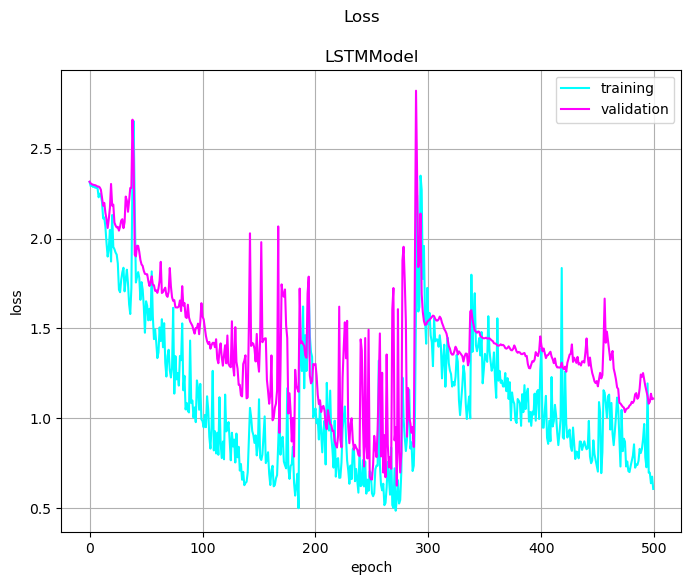

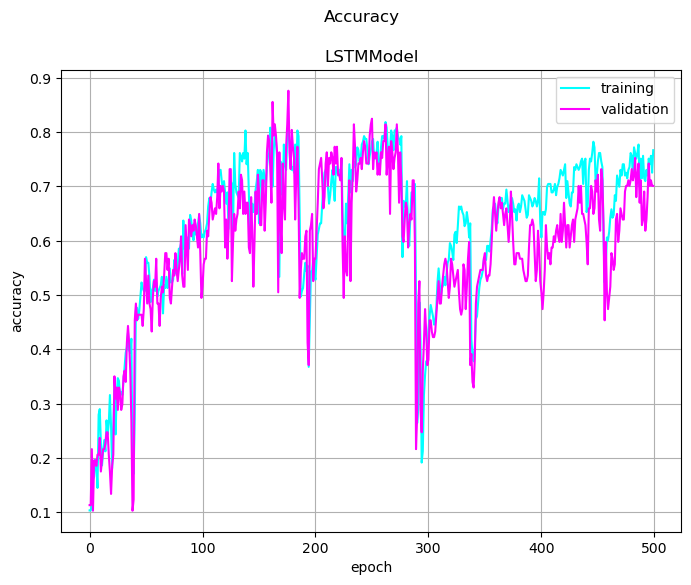

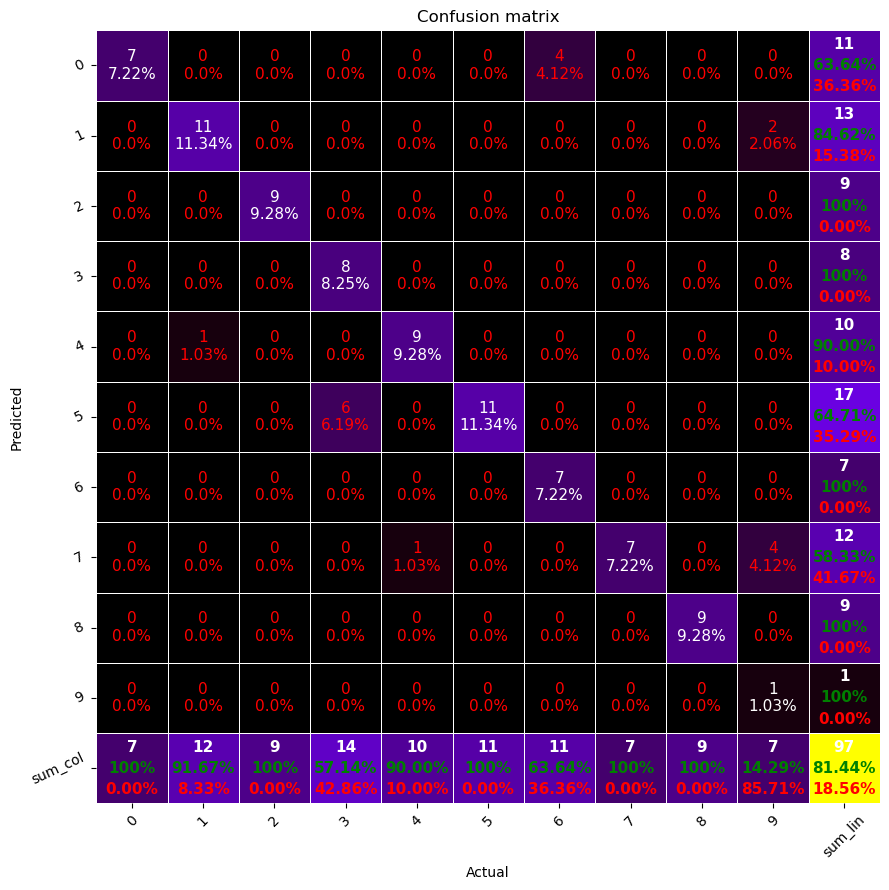

In [8]:
hidden_size = 64
num_layers = 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

stats, best_model = train_model(model,trainloader=trainloader, testloader=testloader, num_epochs=500, criterion=criterion, optimizer=optimizer, device=DEVICE)
predictions, labels = eval_model(best_model, testloader)
plot_train_perf(
    model=best_model,
    path=None,
    train_loss=stats["train_loss"],
    train_acc=stats["train_acc"],
    val_loss=stats["val_loss"],
    val_acc=stats["val_acc"],
)

pp_matrix_from_data(
    labels, predictions, columns=[i for i in range(10)], cmap="gnuplot"
)

### Trenovanie na 150 vzorkach

'Length of train split: 146'

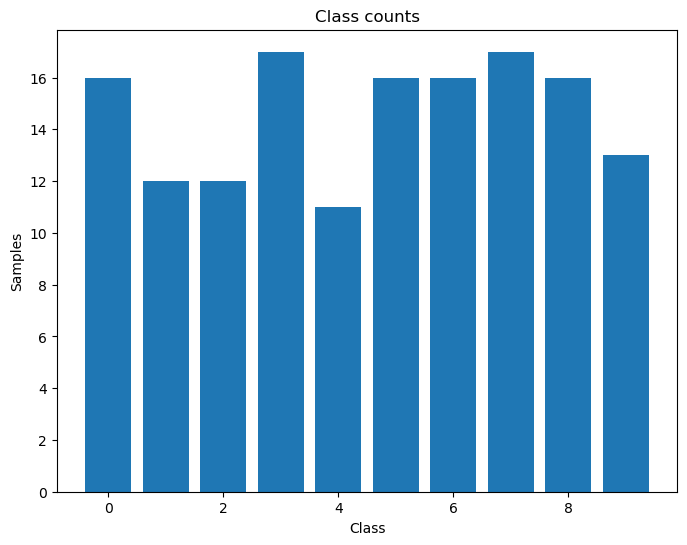

Epoch: 1/350 | Train Accuracy 0.10 | Train Loss 2.30 | Val Accuracy 0.09 | Val Loss 2.30
Epoch: 2/350 | Train Accuracy 0.12 | Train Loss 2.29 | Val Accuracy 0.10 | Val Loss 2.31
Epoch: 3/350 | Train Accuracy 0.10 | Train Loss 2.27 | Val Accuracy 0.10 | Val Loss 2.31
Epoch: 4/350 | Train Accuracy 0.10 | Train Loss 2.27 | Val Accuracy 0.10 | Val Loss 2.32
Epoch: 5/350 | Train Accuracy 0.10 | Train Loss 2.25 | Val Accuracy 0.10 | Val Loss 2.33
Epoch: 6/350 | Train Accuracy 0.10 | Train Loss 2.24 | Val Accuracy 0.10 | Val Loss 2.35
Epoch: 7/350 | Train Accuracy 0.10 | Train Loss 2.21 | Val Accuracy 0.10 | Val Loss 2.38
Epoch: 8/350 | Train Accuracy 0.10 | Train Loss 2.19 | Val Accuracy 0.10 | Val Loss 2.40
Epoch: 9/350 | Train Accuracy 0.11 | Train Loss 2.14 | Val Accuracy 0.14 | Val Loss 2.38
Epoch: 10/350 | Train Accuracy 0.19 | Train Loss 2.06 | Val Accuracy 0.20 | Val Loss 2.36
Epoch: 11/350 | Train Accuracy 0.20 | Train Loss 1.96 | Val Accuracy 0.20 | Val Loss 2.33
Epoch: 12/350 | Tra

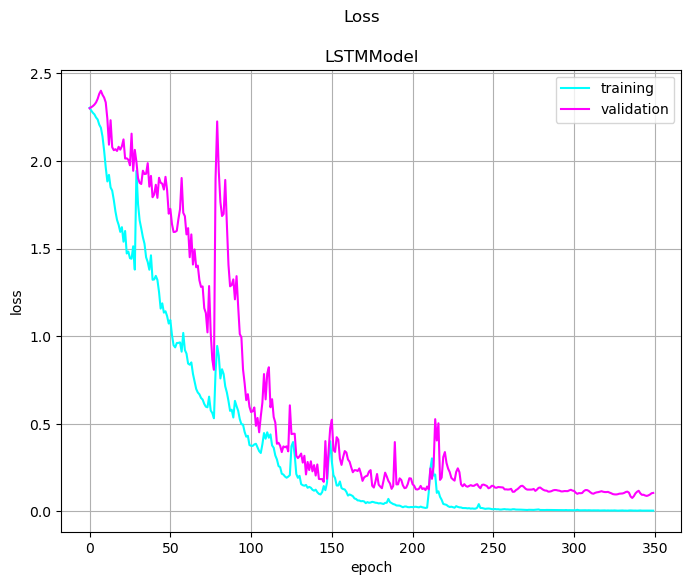

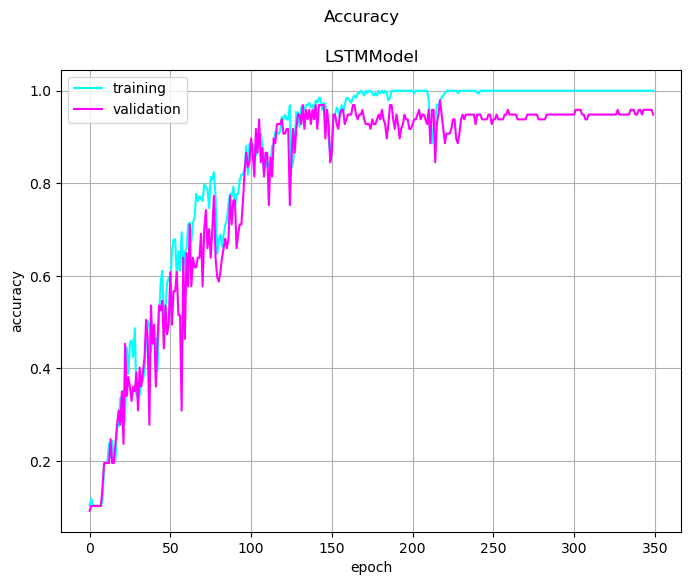

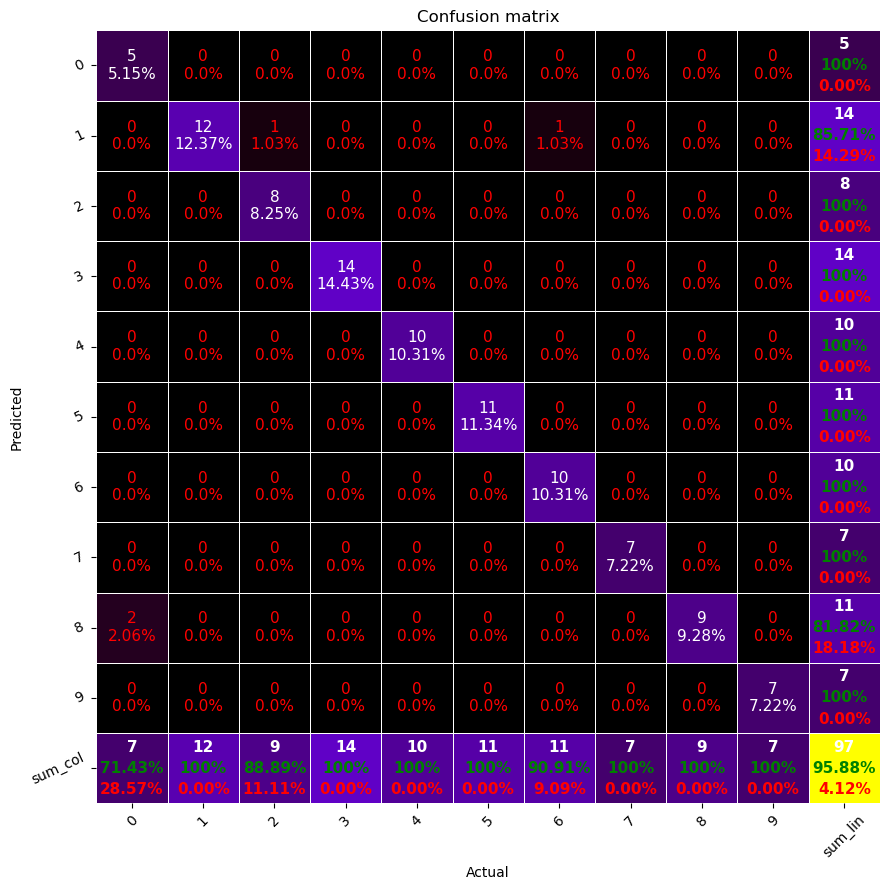

In [9]:
num_layers = 2
model_150 = LSTMModel(input_size, hidden_size, num_layers, output_size).to(DEVICE)
# padding cez collate fn

train_ds_150, _ = uniform_split(dataset=train_ds, split_ratio=0.25 )

trainloader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)

optimizer = optim.Adam(model_150.parameters(), lr=LEARNING_RATE)

display(f"Length of train split: {len(train_ds_150)}")

class_counts = count_class_samples(dataset=train_ds_150)
plt.figure(figsize=(8, 6))
plt.bar(list(class_counts.keys()), list(class_counts.values()))
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Class counts")
plt.show()

stats, best_model = train_model(model_150,trainloader=trainloader, testloader=testloader, num_epochs=EPOCHS, criterion=criterion, optimizer=optimizer, device=DEVICE)

predictions, labels = eval_model(best_model, testloader)

plot_train_perf(
    model=best_model,
    path=None,
    train_loss=stats["train_loss"],
    train_acc=stats["train_acc"],
    val_loss=stats["val_loss"],
    val_acc=stats["val_acc"],
)

pp_matrix_from_data(
    labels, predictions, columns=[i for i in range(10)], cmap="gnuplot"
)

## Trenovanie pre 100 vzoriek

97

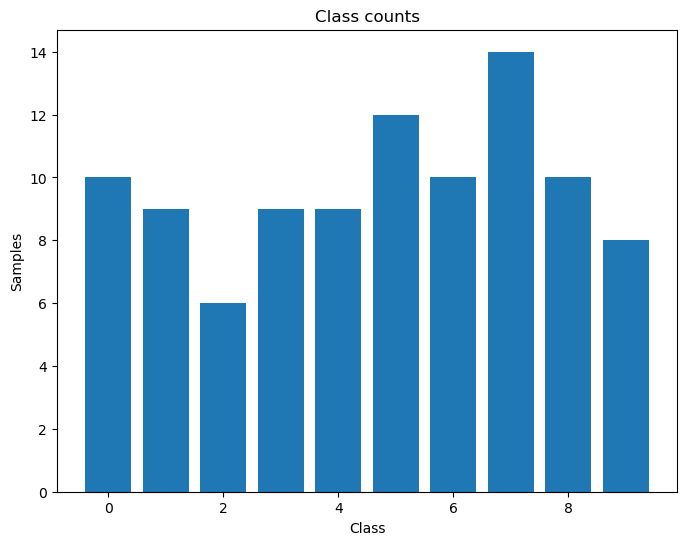

Epoch: 1/350 | Train Accuracy 0.14 | Train Loss 2.32 | Val Accuracy 0.11 | Val Loss 2.30
Epoch: 2/350 | Train Accuracy 0.12 | Train Loss 2.30 | Val Accuracy 0.11 | Val Loss 2.31
Epoch: 3/350 | Train Accuracy 0.12 | Train Loss 2.28 | Val Accuracy 0.11 | Val Loss 2.31
Epoch: 4/350 | Train Accuracy 0.12 | Train Loss 2.30 | Val Accuracy 0.11 | Val Loss 2.32
Epoch: 5/350 | Train Accuracy 0.19 | Train Loss 2.26 | Val Accuracy 0.07 | Val Loss 2.32
Epoch: 6/350 | Train Accuracy 0.14 | Train Loss 2.26 | Val Accuracy 0.07 | Val Loss 2.33
Epoch: 7/350 | Train Accuracy 0.14 | Train Loss 2.30 | Val Accuracy 0.07 | Val Loss 2.33
Epoch: 8/350 | Train Accuracy 0.14 | Train Loss 2.24 | Val Accuracy 0.07 | Val Loss 2.34
Epoch: 9/350 | Train Accuracy 0.14 | Train Loss 2.37 | Val Accuracy 0.07 | Val Loss 2.34
Epoch: 10/350 | Train Accuracy 0.14 | Train Loss 2.32 | Val Accuracy 0.07 | Val Loss 2.34
Epoch: 11/350 | Train Accuracy 0.14 | Train Loss 2.22 | Val Accuracy 0.07 | Val Loss 2.33
Epoch: 12/350 | Tra

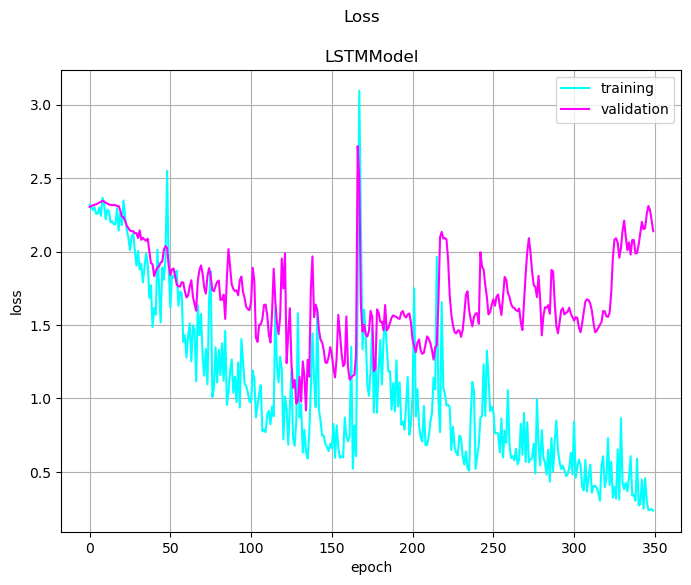

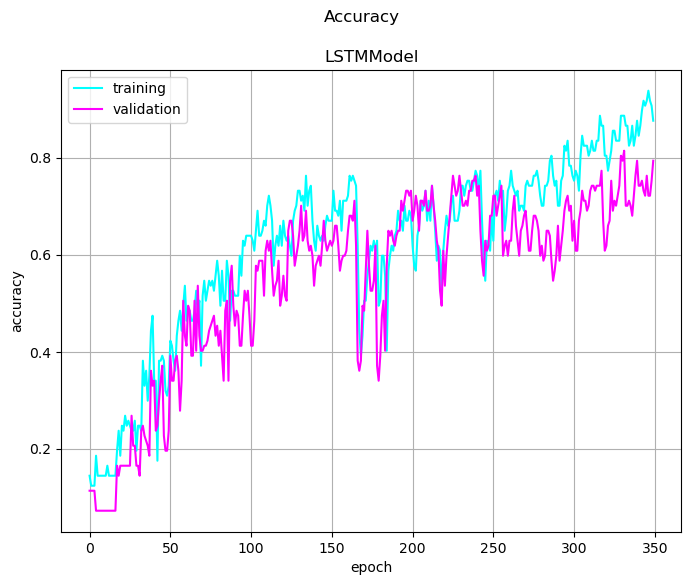

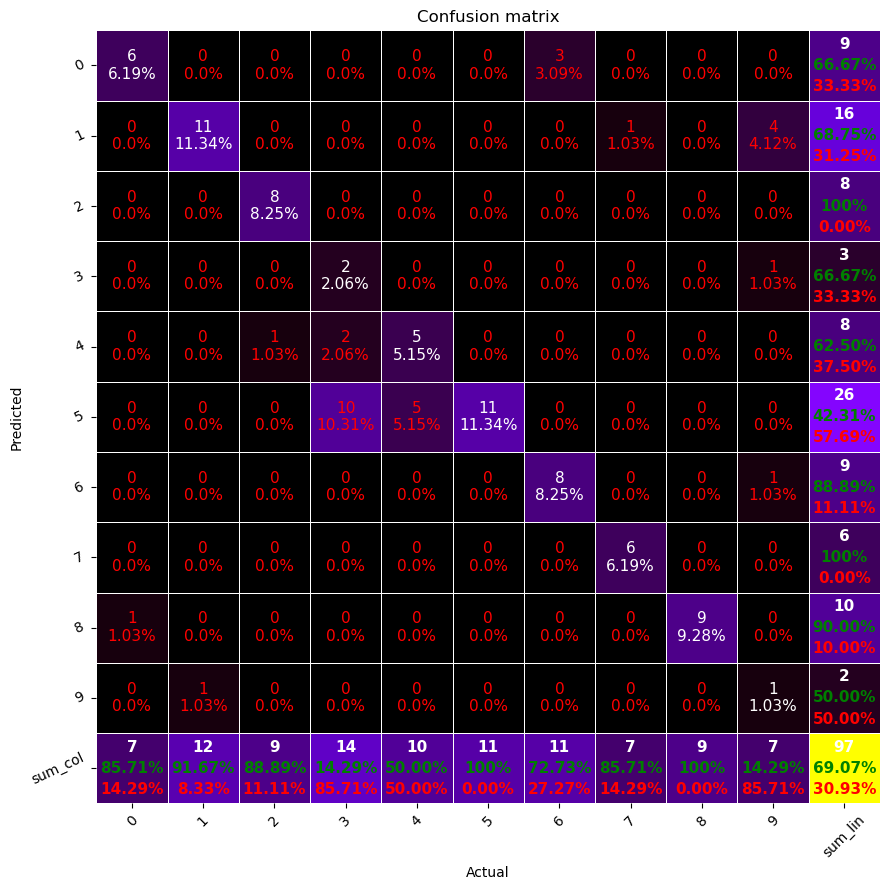

In [10]:
model_100 = LSTMModel(input_size, hidden_size, num_layers, output_size).to(DEVICE)

train_ds_100, _ = uniform_split(dataset=train_ds, split_ratio=0.5 )

trainloader = DataLoader(train_ds_100, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

optimizer = optim.Adam(model_100.parameters(), lr=LEARNING_RATE)

display(len(train_ds_100))

class_counts = count_class_samples(dataset=train_ds_100)
plt.figure(figsize=(8, 6))
plt.bar(list(class_counts.keys()), list(class_counts.values()))
plt.xlabel("Class")
plt.ylabel("Samples")
plt.title("Class counts")
plt.show()

stats, best_model = train_model(model_100,trainloader=trainloader, testloader=testloader, num_epochs=EPOCHS, criterion=criterion, optimizer=optimizer, device=DEVICE)

predictions, labels = eval_model(best_model, testloader)

plot_train_perf(
    model=best_model,
    path=None,
    train_loss=stats["train_loss"],
    train_acc=stats["train_acc"],
    val_loss=stats["val_loss"],
    val_acc=stats["val_acc"],
)

pp_matrix_from_data(
    labels, predictions, columns=[i for i in range(10)], cmap="gnuplot"
)
